In [1]:
#!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import math
import collections
import networkx as nx
import matplotlib.pyplot as plt
import helper.graphgeneration as gg

from tqdm import tqdm
from pathlib import Path

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Graph generation
This notebook aims to generate a graph based on the annotators and their annotation behavior. The output is a .gexf file containing the graph.

### Parameters

In [3]:
path_comments = "00_data/attack_annotated_comments.tsv"
path_annotations = "00_data/attack_annotations.tsv"
path_workers = "00_data/attack_worker_demographics.tsv"
path_export = "./01_processed_data/200903_run_004/200903_00_graph_"

min_overlap = 1

### Load data

In [4]:
df_annotations = pd.read_csv(Path(path_annotations), sep="\t", encoding="utf-8")
print("Number of annotations:", len(df_annotations))

Number of annotations: 1365217


### Transform data

In [5]:
df_annotations_pivot = pd.pivot_table(df_annotations, values='attack', index=['rev_id'], columns=['worker_id'], aggfunc=np.sum)
df_annotations_pivot.head()

worker_id,0,1,2,3,4,5,6,7,8,9,...,4043,4044,4045,4046,4047,4048,4049,4050,4051,4052
rev_id,,,,,,,,,,,,,,,,,,,,,
37675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# function to normalize data 
def changeWeights(G,change):
    for u,v,a in G.edges(data=True):
        a['weight'] = a['weight'] - change
    return G 

100%|██████████| 4053/4053 [04:13<00:00, 16.02it/s] 


Len:	 8211378
Len ~0:	 444344
Mean:	 1.1297058135138542
Min:	 1
Max:	 20
STD:	 0.5657579364140655
MED:	 1.0


(array([8.00000e+00, 5.40000e+01, 1.65398e+05, 2.00000e+01, 2.46000e+02,
        7.82000e+02, 1.28000e+02, 1.08500e+04, 5.40000e+01, 1.82800e+03,
        1.88000e+02, 6.52940e+05, 5.06480e+04, 3.89000e+03, 1.07200e+03,
        4.32000e+02, 1.04000e+02, 2.60000e+01, 1.00000e+01, 2.00000e+00,
        8.00000e+00]),
 array([0.57368421, 0.61779449, 0.66190476, 0.70601504, 0.75012531,
        0.79423559, 0.83834586, 0.88245614, 0.92656642, 0.97067669,
        1.01478697, 1.05889724, 1.10300752, 1.14711779, 1.19122807,
        1.23533835, 1.27944862, 1.3235589 , 1.36766917, 1.41177945,
        1.45588972, 1.5       ]),
 <a list of 21 Patch objects>)

Text(0.5, 1.0, 'Weight distribution')

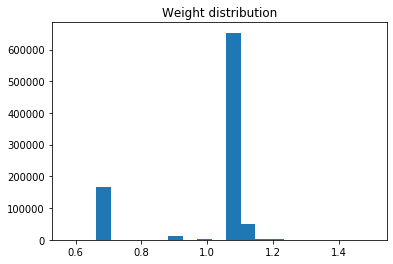

[0.57368421 0.61578947 0.62631579 0.63684211 0.64421053 0.64736842
 0.65157895 0.65789474 0.66842105 0.67368421 0.67894737 0.68842105
 0.68947368 0.69578947 0.7        0.72947368 0.73368421 0.74210526
 0.74631579 0.75052632 0.75894737 0.76315789 0.76736842 0.8
 0.80315789 0.80736842 0.81052632 0.81157895 0.81368421 0.81473684
 0.81789474 0.86842105 0.87263158 0.87473684 0.87684211 0.87894737
 0.88105263 0.88315789 0.88736842 0.89368421 0.90526316 0.91578947
 0.92631579 0.93684211 0.94736842 0.95263158 0.95789474 0.96315789
 0.96842105 0.97368421 0.98421053 0.99052632 0.99894737 1.00315789
 1.00736842 1.01578947 1.03263158 1.03789474 1.04105263 1.04947368
 1.06421053 1.07263158 1.07894737 1.08421053 1.09368421 1.09578947
 1.1        1.10736842 1.12105263 1.12315789 1.13789474 1.14210526
 1.15263158 1.16315789 1.16526316 1.16736842 1.18210526 1.18421053
 1.18526316 1.19684211 1.20315789 1.20526316 1.22105263 1.22631579
 1.23894737 1.24736842 1.25578947 1.25684211 1.26842105 1.27052632
 1

100%|██████████| 4053/4053 [01:14<00:00, 54.09it/s] 


Len:	 8211378
Len ~0:	 444344
Mean:	 1.1297058135138542
Min:	 1
Max:	 20
STD:	 0.5657579364140655
MED:	 1.0


(array([1.65434e+05, 6.00000e+00, 8.00000e+00, 5.00000e+01, 6.80000e+01,
        1.60000e+02, 2.60000e+01, 7.74000e+02, 8.40000e+01, 4.00000e+01,
        1.08860e+04, 2.80000e+01, 2.06000e+02, 2.80000e+01, 1.72000e+03,
        6.74000e+02, 3.48000e+02, 2.04000e+02, 3.64000e+02, 3.60000e+01,
        7.07544e+05]),
 array([0.5       , 0.54761905, 0.5952381 , 0.64285714, 0.69047619,
        0.73809524, 0.78571429, 0.83333333, 0.88095238, 0.92857143,
        0.97619048, 1.02380952, 1.07142857, 1.11904762, 1.16666667,
        1.21428571, 1.26190476, 1.30952381, 1.35714286, 1.4047619 ,
        1.45238095, 1.5       ]),
 <a list of 21 Patch objects>)

Text(0.5, 1.0, 'Weight distribution')

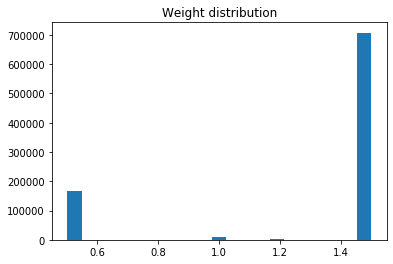

[0.5        0.56666667 0.57142857 0.57692308 0.6        0.625
 0.63333333 0.64285714 0.65384615 0.66666667 0.7        0.72222222
 0.73076923 0.75       0.78571429 0.79411765 0.8        0.80769231
 0.83333333 0.85294118 0.85714286 0.86363636 0.875      0.9
 0.91666667 0.92857143 0.94444444 0.95454545 0.96153846 1.
 1.02941176 1.03846154 1.05555556 1.07142857 1.08333333 1.1
 1.11538462 1.125      1.16666667 1.2        1.20588235 1.21428571
 1.22727273 1.23333333 1.25       1.26923077 1.27777778 1.3
 1.31818182 1.32352941 1.33333333 1.34615385 1.35714286 1.36666667
 1.375      1.38888889 1.4        1.40909091 1.41666667 1.42307692
 1.43333333 1.44444444 1.5       ]


  0%|          | 0/4053 [00:00<?, ?it/s]/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:604: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
100%|██████████| 4053/4053 [04:45<00:00, 14.22it/s] 


Len:	 8211378
Len ~0:	 444344
Mean:	 1.1297058135138542
Min:	 1
Max:	 20
STD:	 0.5657579364140655
MED:	 1.0


(array([2.4200e+02, 4.0000e+01, 0.0000e+00, 1.4000e+01, 1.7400e+02,
        1.2000e+01, 4.2000e+01, 4.2000e+01, 3.2000e+01, 1.7995e+05,
        5.6000e+01, 9.4000e+01, 6.0000e+01, 1.8800e+02, 1.3000e+02,
        5.8000e+01, 1.0000e+01, 0.0000e+00, 1.4720e+03]),
 array([0.5       , 0.55263158, 0.60526316, 0.65789474, 0.71052632,
        0.76315789, 0.81578947, 0.86842105, 0.92105263, 0.97368421,
        1.02631579, 1.07894737, 1.13157895, 1.18421053, 1.23684211,
        1.28947368, 1.34210526, 1.39473684, 1.44736842, 1.5       ]),
 <a list of 19 Patch objects>)

Text(0.5, 1.0, 'Weight distribution')

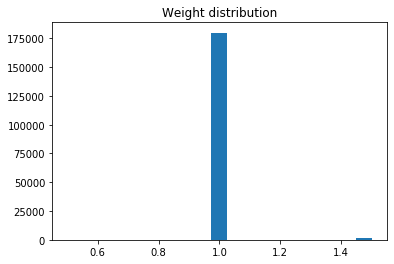

[0.5        0.53846154 0.6        0.66666667 0.7        0.73913043
 0.75       0.78571429 0.81818182 0.83333333 0.84       0.85714286
 0.86363636 0.875      0.88461538 0.9        0.9        0.91666667
 0.92307692 0.928      0.92857143 0.9375     0.94444444 0.96
 0.96153846 1.         1.01492537 1.01538462 1.01724138 1.01785714
 1.02702703 1.02777778 1.03125    1.03448276 1.03846154 1.03940887
 1.04347826 1.04545455 1.04705882 1.05882353 1.06097561 1.0625
 1.06896552 1.07142857 1.07476636 1.0754717  1.07894737 1.08333333
 1.09090909 1.09459459 1.09677419 1.1        1.10280374 1.10377358
 1.10526316 1.11111111 1.125      1.13157895 1.13513514 1.13793103
 1.14285714 1.15789474 1.1641791  1.16666667 1.17857143 1.18181818
 1.18604651 1.19230769 1.2        1.20833333 1.22222222 1.23076923
 1.25       1.26190476 1.26315789 1.26470588 1.27272727 1.28
 1.28571429 1.29166667 1.29411765 1.2972973  1.2992126  1.3
 1.30769231 1.31034483 1.33333333 1.34782609 1.35714286 1.36
 1.5       ]


  0%|          | 0/4053 [00:00<?, ?it/s]/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/krippendorff/krippendorff.py:273: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (o * d).sum() / (e * d).sum()
100%|██████████| 4053/4053 [02:52<00:00, 23.51it/s] 


Len:	 8211378
Len ~0:	 444344
Mean:	 1.1297058135138542
Min:	 1
Max:	 20
STD:	 0.5657579364140655
MED:	 1.0


(array([2.00000e+01, 1.28000e+02, 4.10000e+02, 4.20000e+01, 5.14800e+03,
        1.90000e+02, 8.94000e+02, 4.06000e+02, 2.64000e+02, 1.73098e+05,
        8.40000e+01, 4.20000e+01, 3.60000e+01, 1.84000e+02, 1.30000e+02,
        5.80000e+01, 1.00000e+01, 0.00000e+00, 1.47200e+03]),
 array([0.53846154, 0.58906883, 0.63967611, 0.6902834 , 0.74089069,
        0.79149798, 0.84210526, 0.89271255, 0.94331984, 0.99392713,
        1.04453441, 1.0951417 , 1.14574899, 1.19635628, 1.24696356,
        1.29757085, 1.34817814, 1.39878543, 1.44939271, 1.5       ]),
 <a list of 19 Patch objects>)

Text(0.5, 1.0, 'Weight distribution')

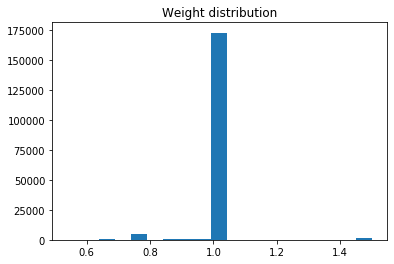

[0.53846154 0.55555556 0.5625     0.57142857 0.58333333 0.59375
 0.6        0.60714286 0.625      0.63636364 0.64705882 0.66666667
 0.67857143 0.68639053 0.6875     0.70833333 0.71428571 0.72727273
 0.75       0.75595238 0.76470588 0.7654321  0.76923077 0.77622378
 0.77777778 0.7890625  0.78947368 0.79166667 0.8        0.8
 0.8125     0.81818182 0.82142857 0.83673469 0.84210526 0.84375
 0.84615385 0.85       0.85714286 0.86111111 0.8625     0.86315789
 0.86538462 0.86666667 0.875      0.88888889 0.89256198 0.89285714
 0.89473684 0.9037037  0.9047619  0.90625    0.90909091 0.91666667
 0.92       0.92307692 0.925      0.93333333 0.93706294 0.9375
 0.94117647 0.94736842 0.95       0.95238095 0.95652174 0.95833333
 0.96       0.9609375  0.96296296 0.96428571 0.96875    0.96969697
 0.97222222 0.975      0.97530864 0.97727273 0.97802198 0.97916667
 0.98333333 0.98529412 1.         1.00714286 1.01680672 1.02020202
 1.02777778 1.02857143 1.04761905 1.0625     1.06349206 1.06666667
 1.075      

In [7]:
types = ['heuristic','agreement','cohen','krippendorff']
#types = ['krippendorff']
for selected_type in types:
    # generate graph
    if selected_type == 'heuristic':
        distance_matrix,list_overlaps = gg.getWeightHeuristicMatrix(df_annotations_pivot,min_overlap=min_overlap)
    if selected_type == 'agreement':
        distance_matrix,list_overlaps = gg.getWeightMatrix(df_annotations_pivot,min_overlap=min_overlap)
    if selected_type == 'cohen':
        distance_matrix,list_overlaps = gg.getWeightCohensKappaMatrix(df_annotations_pivot,min_overlap=min_overlap)
    if selected_type == 'krippendorff':
        distance_matrix,list_overlaps = gg.getWeightKrippendorffMatrix(df_annotations_pivot)   
    
    # stats
    np_overlaps = np.array(list_overlaps)
    np_overlaps_wo_zero = np.delete(np_overlaps, np.argwhere(np_overlaps == 0))
    print("Len:\t",len(np_overlaps))
    print("Len ~0:\t",len(np_overlaps_wo_zero))
    print("Mean:\t",np.mean(np_overlaps_wo_zero))
    print("Min:\t",np.min(np_overlaps_wo_zero))
    print("Max:\t",np.max(np_overlaps_wo_zero))
    print("STD:\t",np.std(np_overlaps_wo_zero))
    print("MED:\t",np.median(np_overlaps_wo_zero))
    
    matrix_flatten = distance_matrix.flatten()
    matrix_flatten = np.delete(matrix_flatten, np.argwhere(matrix_flatten == 0))
    plt.hist(matrix_flatten, bins='auto')  
    plt.title("Weight distribution")  
    plt.show() 
    
    print(np.unique(matrix_flatten))
    
    # save graph
    G = nx.from_numpy_array(distance_matrix, create_using=nx.Graph)
    
    # weight in the adj matrix are between 0.5 and 1.5 because 0 means no edge
    # changeWeights() readjusts the weights so that they are between 0 and 1 
    G = changeWeights(G,0.5)
    nx.write_gexf(G, path_export + selected_type +".gexf")